> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: IMDB Data Anaysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The movie data set in this project is orginally from Kaggle. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), it includes budget, revenue, title, cast, director, release date and so on. The data set duration covers from 1960 to 2015.
>
>
>In this project, I will focus on finding the factors which are associated with the successful movies (the movie has the highest revenue). The process for doing the analyses is as below,
>
><li>Data Wrangling</li>
><li>Data Cleaning</li>
><li>Exploratory Data Analysis</li>
><li>Conclusion</li>

In [3]:
#!conda install -y -c anaconda seaborn=0.9.0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In the first step, I will browse the data and see what the variables might be useful for my analyses and also ensure which data I should do the data cleaning

### General Properties

In [27]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> From the above observation, we found that in columns like cast and genres have multiple values and are seperated by the symbol "|". We should consider if we need to deal with this issue or maybe not becuase we might not need to use these factors. 


In [28]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>In the above table, we found that some minimal value in some factors are 0 which doesn't make sense. For example, the minimal runtime is 0, the minimal budget is 0 and the minimal revenue is 0. So I dig into the data futher and try to figure out if these zero values are missing value.  

In [29]:
df[df.budget == 0].head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07


From the table above, I picked up a movie with the bedget is 0. From the Wikipedia, I found the budget for the movie "Mr. Holmes" which I picked up is 10 million. So I have confident that the zero value is missing value. Then I should decide to deal with this missing (drop or keep).  

In [30]:
budget_zero_count = df.query('budget == 0').count()['budget']
budget_non_zero_count = df.query('budget != 0').count()['budget']
budget_zero_count, budget_non_zero_count

(5696, 5170)

From the above result, we found that dropping the zero value might not be a good idea because there are more than half values in the budget are 0. So I decide to keep it for now.

In [31]:
revenue_zero_count = df.query('revenue == 0').count()['revenue']
revenue_non_zero_count = df.query('revenue != 0').count()['revenue']
revenue_zero_count, revenue_non_zero_count

(6016, 4850)

From the above result, we found that dropping the zero value might not be a good idea because there are more than half values in the budget are 0. So I decide to keep it for now too.

In [32]:
runtime_zero_count = df.query('runtime == 0').count()['runtime']
runtime_non_zero_count = df.query('runtime != 0').count()['runtime']
runtime_zero_count, runtime_non_zero_count

(31, 10835)

From the above result, there is only 31 zero values in runtime. Compare to revenue and budget, or even the total numbers for runtime, it is an extremely small number. So I decide to drop zero from runtime.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

From the observation, we found that some factors such as imdb_id, cast, homepage, tagline and so on have null value. We need to consider about how we should deal the null value (drop the null or fill the null) or maybe we don't need to solve this issue because the factors we want to use might not have any null value but only data type issue.

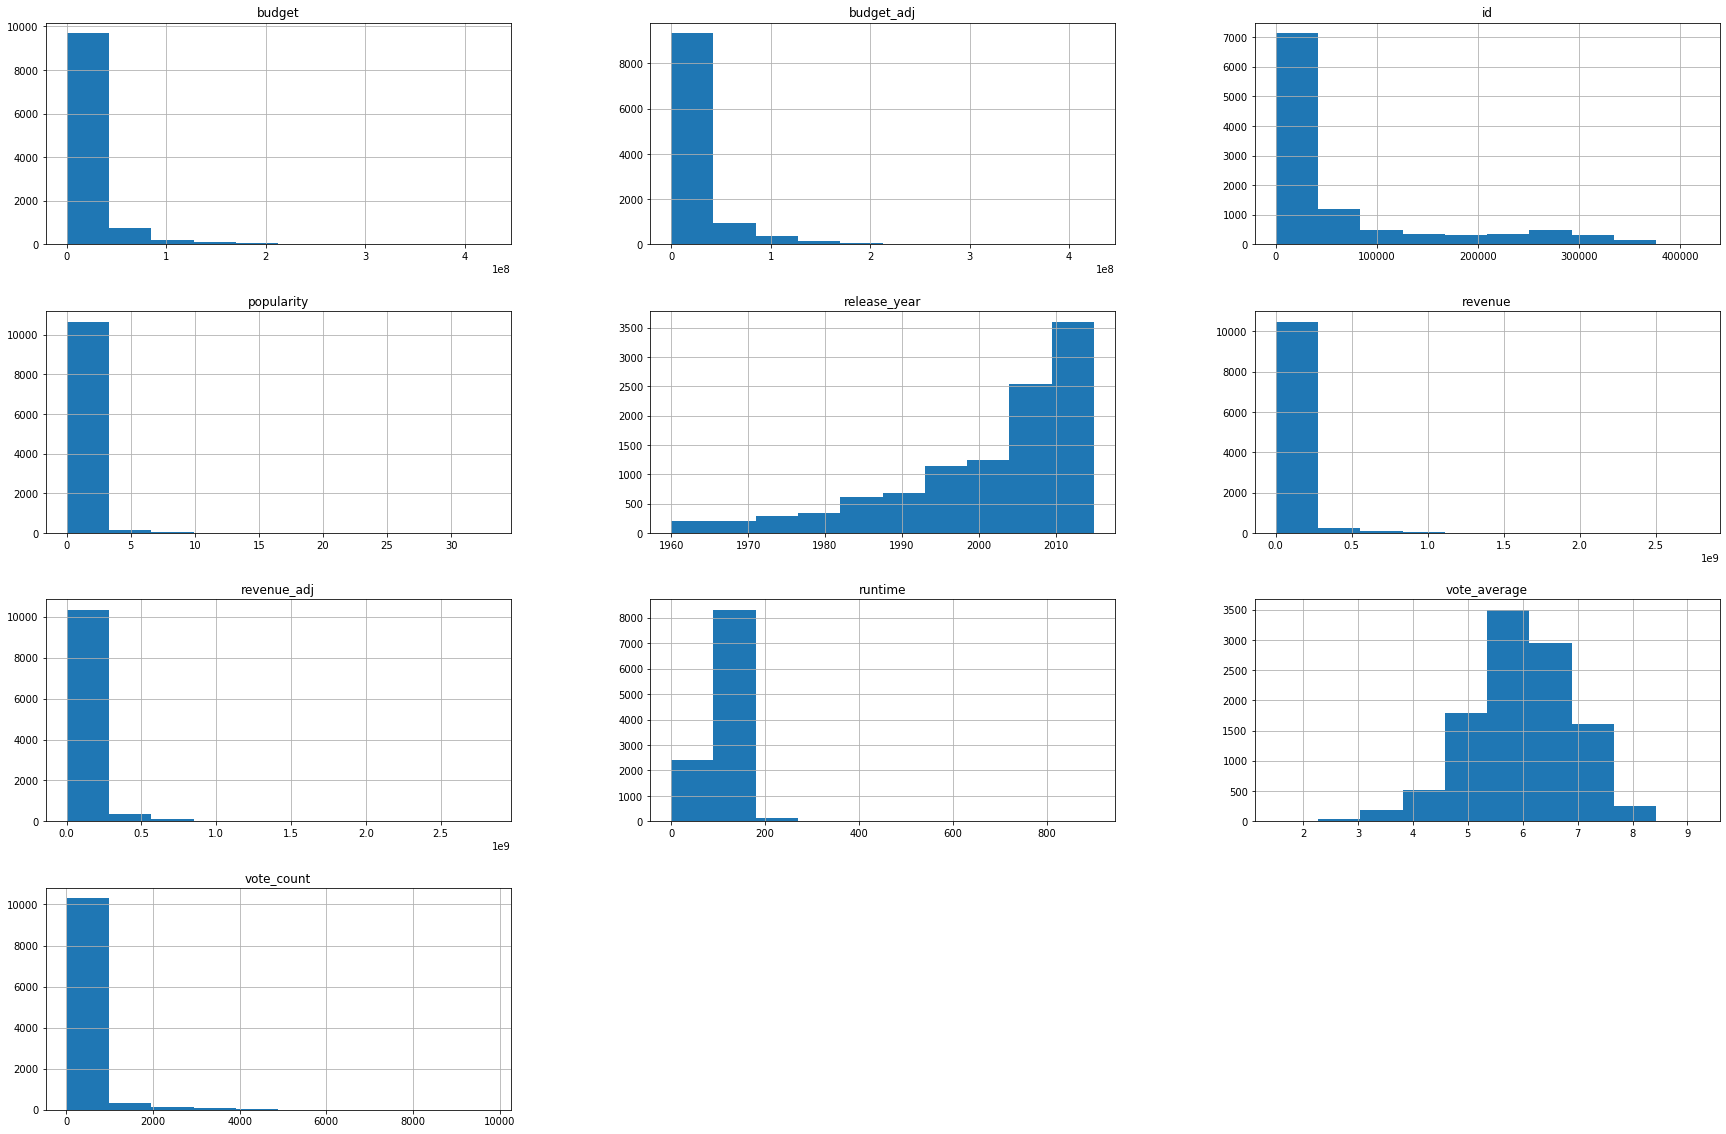

In [34]:
df.hist(figsize=(30,20));

From the above charts, I tried to obseve the skew by using the bar charts for the differnt factors to see if there is any unmeanful issue.

### Data Cleaning 
> In this process, I tried to drop the factors I don't need and deal with any missing values to make sure my analyses are correct. And below are the items I worked on,
>
><li>Drop the zero value in runtime</li>
><li>Drop the columns I don't need</li>
><li>drop the missing value</li>
><li>drop the duplicate value</li>
><li>replace the zero value in budget and revenue columns to NA</li>

In [35]:
# Drop zero value in runtime
df.query('runtime != 0', inplace = True)
# Check the result
df[df.runtime==0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [36]:
# Drop the columns I dont need
col = ['imdb_id', 'homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj']
df.drop(col, axis=1, inplace=True)

In [37]:
#replace the zero value in budget and revenue columns to NA
df.budget = df.budget.replace(0,np.NaN)
df.revenue = df.revenue.replace(0,np.NaN)
#Check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10835 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10835 non-null  int64  
 1   popularity            10835 non-null  float64
 2   budget                5167 non-null   float64
 3   revenue               4850 non-null   float64
 4   original_title        10835 non-null  object 
 5   cast                  10759 non-null  object 
 6   director              10793 non-null  object 
 7   keywords              9358 non-null   object 
 8   runtime               10835 non-null  int64  
 9   genres                10813 non-null  object 
 10  production_companies  9823 non-null   object 
 11  release_date          10835 non-null  object 
 12  vote_count            10835 non-null  int64  
 13  vote_average          10835 non-null  float64
 14  release_year          10835 non-null  int64  
dtypes: float64(4), int6

In [38]:
#drop the missing value
df.dropna(inplace=True)

In [39]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3678.000000,3678.000000,3.678000e+03,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000
mean,39225.333605,1.225880,3.811245e+07,1.114105e+08,109.556552,547.583197,6.182436,2001.094345
std,67240.505709,1.498729,4.267018e+07,1.793474e+08,19.854487,894.862105,0.789743,11.379792
min,5.000000,0.010335,1.000000e+00,2.000000e+00,26.000000,10.000000,2.200000,1960.000000
25%,5478.250000,0.481364,1.000000e+07,1.489561e+07,96.000000,78.000000,5.700000,1995.000000
50%,11019.500000,0.829585,2.500000e+07,4.804570e+07,106.000000,218.500000,6.200000,2004.000000
75%,38027.000000,1.410847,5.000000e+07,1.297594e+08,119.750000,595.500000,6.700000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


From the table above, we can find that after the data cleaning, the minimum values for budget, revenue and runtime are more reasonable. The next step will be using this clean data to do the data analyses.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: In exploratory data analysis, I am going to do the analyses about which factors will be the key for a good movie. Before start to work on this, we should define what the successful movie is. In my opinion, a good movie has good review rating, good revenue or high popularity. However, there are less movies can have all these positive factors, some movies might have good reviews but not well known, or some movies have high revenue but lower review rating. I would like to treate those movies with one of these postive factors as successful movies, and I would also like to compare these factors and see how the relationships between each other.

### Research Question 1 - Revenue and popularity over year

In [71]:
# Create a function for generate plot chart about the trend over year
def trend(dfname, column_name):
    dfname_new = dfname.groupby('release_year')[column_name].mean()
    dfname_new.plot()
    plt.xlabel('release year')
    plt.ylabel(column_name)
    plt.title('Trend of ' + column_name + ' Over Year')
    return dfname_new.plot()
    


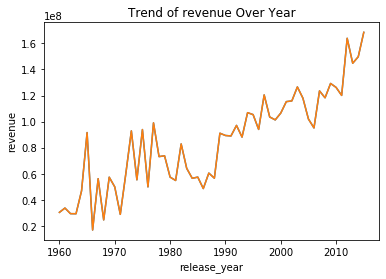

In [72]:
# Observe the trend of the revenue from 1960 to 2015
trend(df, 'revenue')

> We found that the trend of revenue over the year has been increased significantly. Before observing the relationship between popularity and revenue, I would like to check the popularity over year as well.

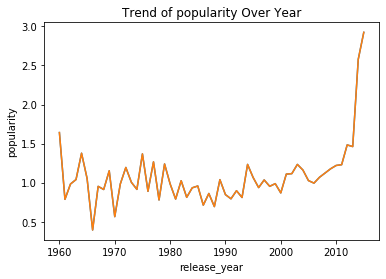

In [73]:
# Observe the trend of the popularity from 1960 to 2015
trend(df, 'popularity')

From the above chart, we can find that the trend for popularity over year is very similar with the trend for revenue over the year. Both has been increasing significantly. 

    release_year  popularity       revenue
50          2010    0.802172  1.067836e+08
51          2011    0.818565  1.023146e+08
52          2012    0.792775  1.296983e+08
53          2013    0.788373  1.160958e+08
54          2014    1.103611  1.144046e+08
55          2015    1.357360  1.365802e+08


/Users/haoweichen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/Users/haoweichen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/Users/haoweichen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Text(0, 0.5, 'Revenue')

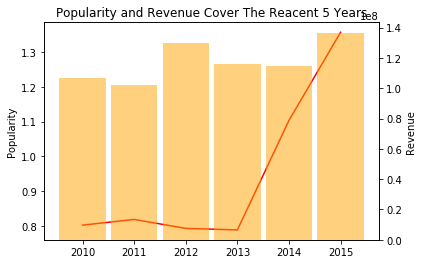

In [240]:
df.mean_popularity_revenue = df.groupby('release_year', as_index=False)['popularity','revenue'].mean()
df.m_p_r_5ys = df.mean_popularity_revenue.query('release_year >= 2010')
print(df.m_p_r_5ys)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # set up the 2nd axis
ax1.plot(df.m_p_r_5ys.release_year, df.m_p_r_5ys.popularity, color='red') #plot the Revenue on axis #1
ax2.bar(df.m_p_r_5ys.release_year, df.m_p_r_5ys.revenue, width=0.9, alpha=0.5, color='orange')

ax1.set_title('Popularity and Revenue Cover The Reacent 5 Years')
ax1.set_ylabel('Popularity')
ax2.set_ylabel('Revenue')

From the above chart, we found that the trend of revenue in the most recent 5 years was flat. However, the trend of popularity was flat in first 4 years but increased significantly from 2013. And we can see that the revenue in 2013 decrease slightly from 2013 to 2014. I think popularity is increasing maybe because people can get the information much easier as time went by. 

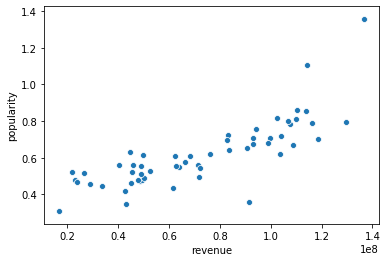

In [241]:
ax = sns.scatterplot(x="revenue", y="popularity", data=df.mean_popularity_revenue)

From the above chart we can tell that the correlation between ppopularity and revenue is positive. The data we use for this chart is from 1960 to 2015.


### Research Question 2 - Budget and popularity over year

/Users/haoweichen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Text(0, 0.5, 'budget')

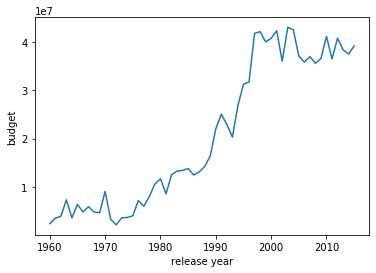

In [242]:
# Observe the trend of the budget from 1960 to 2015
df.mean_budget = df.groupby('release_year').budget.mean()
df.mean_budget.plot()
plt.xlabel('release year')
plt.ylabel('budget')

From the above chart, we can find that the trend for budget is increasing over the years. However, it becomes flat in the recent years.

/Users/haoweichen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Year')

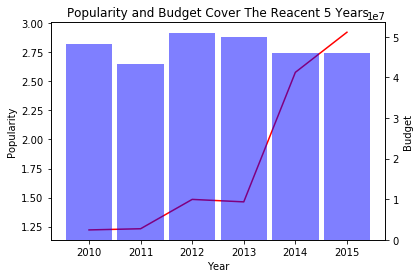

In [68]:
df.mean_budget_popularity = df.groupby('release_year', as_index = False)['budget', 'popularity'].mean()
df.m_b_p_5ys = df.mean_budget_popularity.query('release_year >= 2010')
df.m_b_p_5ys

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # set up the 2nd axis
ax1.plot(df.m_b_p_5ys.release_year, df.m_b_p_5ys.popularity, color='red') #plot the Revenue on axis #1
ax2.bar(df.m_b_p_5ys.release_year, df.m_b_p_5ys.budget, width=0.9, alpha=0.5, color='blue')

ax1.set_title('Popularity and Budget Cover The Reacent 5 Years')
ax1.set_ylabel('Popularity')
ax2.set_ylabel('Budget')
ax1.set_xlabel('Year')


From the above chart, we found that the trend of budget in the most recent 5 years was flat. However, the trend of popularity was flat in first 4 years but increased significantly from 2013. I think popularity is increasing maybe because people can get the information much easier as time went by.

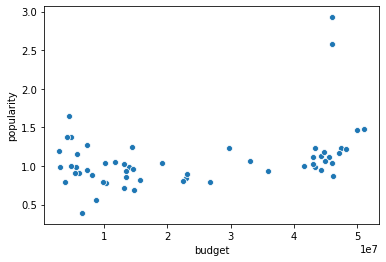

In [66]:
ax = sns.scatterplot(x="budget", y="popularity",data=df.mean_budget_popularity)

From the above chart, we can tell that the correlation between popularity and budget is positive. The data we use here is through 1960 to 2015.


### Research Question 3. What’s casts, directors, production companies are associated with high popularity

            Top 5 Casts  count
319  Scarlett Johansson      6
64      Chris Hemsworth      4
167   Jennifer Lawrence      4
347           Tom Hardy      4
304   Robert Downey Jr.      4


Text(0, 0.5, 'Count')

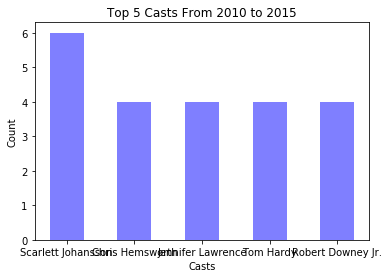

In [59]:
#Find top 100 popularity movies in the recent 5 years
df_5_years = df.query('release_year >= 2010')
top100_movies = df_5_years.sort_values(by='popularity', ascending = False).head(100)
#top100_movies.head()
top100_movies_cast_list = top100_movies.cast.str.cat(sep='|').split('|')
#top100_movies_cast_list
top_100_cast = pd.DataFrame({'top 100 Cast' : top100_movies_cast_list})
top_100_cast['count'] = 1
top_100_cast = top_100_cast.groupby('top 100 Cast', as_index = False)['count'].sum()
top_5_cast = top_100_cast.sort_values('count', ascending=False).head(5)
df_new = df.rename(columns={'A': 'a'}, index={'ONE': 'one'})
top_5_cast = top_5_cast.rename(columns={'top 100 Cast':'Top 5 Casts'})
print(top_5_cast)
plt.bar(top_5_cast['Top 5 Casts'], top_5_cast['count'], width=0.5, alpha=0.5, color='blue')
plt.title('Top 5 Casts From 2010 to 2015')
plt.xlabel('Casts')
plt.ylabel('Count')

> From above table we know that the top 5 casts appear more frequently in the top 100 movies from the most recent 5 years are Scarlett Johansson, Ian Mckellen, Leonardo DiCaprio, Mark Ruffalo and Chris Evans.

      Top 5 Directors  count
65      Peter Jackson      3
67      Pierre Coffin      3
32   Francis Lawrence      3
69       Ridley Scott      3
17  Christopher Nolan      3


Text(0, 0.5, 'Count')

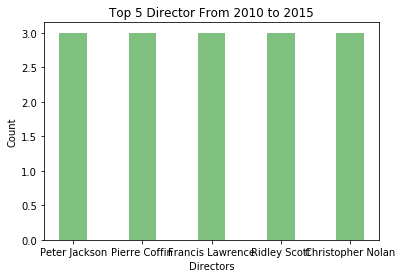

In [58]:
top_100_movies_popularity_directors = top100_movies.director.str.cat(sep='|').split('|')
top_100_director = pd.DataFrame({'top 100 director': top_100_movies_popularity_directors})
top_100_director['count'] = 1
top_100_director = top_100_director.groupby('top 100 director', as_index=False)['count'].sum()
top_5_director = top_100_director.sort_values('count', ascending=False).head(5)
top_5_director = top_5_director.rename(columns={'top 100 director':'Top 5 Directors'})
print(top_5_director)
plt.bar(top_5_director['Top 5 Directors'], top_5_director['count'], width=0.4, alpha=0.5, color='green')
plt.title('Top 5 Director From 2010 to 2015')
plt.xlabel('Directors')
plt.ylabel('Count')

> From above table we know that the top 5 directors who have the more top 100 popularities movies in the most recent 5 years are Peter Jackson, Pierre Coffin, Ridley Scott, Francis Lawrence and Christopher Nolan.

In [76]:
top_100_movies_popularity_production = top100_movies.production_companies.str.cat(sep='|').split('|')
top_100_production_companies = pd.DataFrame({'top 100 production companies': top_100_movies_popularity_production})
top_100_production_companies['count'] = 1
top_100_production_companies = top_100_production_companies.groupby('top 100 production companies', as_index=False)['count'].sum()
top_5_production_companies = top_100_production_companies.sort_values('count', ascending=False).head(5)
top_5_production_companies = top_5_production_companies.rename(columns={'top 100 production companies':'Top 5 Production Companies'})
top_5_production_companies


,Top 5 Production Companies,count
179,Warner Bros.,14
102,Marvel Studios,10
159,TSG Entertainment,9
170,Universal Pictures,9
36,Columbia Pictures,9


> From above table we know that the top 5 production companies which have the more top 100 popular movies in the most recent 5 years are Warner Bros., Marval Studios, Coliumbia Pictures, TSG Entertainment and Universal Pictures.

<a id='conclusions'></a>
## Conclusions

> In this project, we mainly focus on what the successful movies should have any facots, such as budget, cast, dirctor and so on. And below is the process we are doing our analyses this time,
><ul>
><li>Data Wrangling</li>
><li>Data Cleaning</li>
><li>Data Exploring</li>
></ul>
> Through Data exploring, I decide to only include the most recent 5 years data to do the analyses because I found some factors such as budget and popularity have been increasing dramatically from 1960 to 2015 base on many reasons such as technology. 
>Base on our 3 questions, we can have some conclusions as below,
><ul>
><li>we found that the trend of revenue in the most recent 5 years was flat. However, the trend of popularity was flat in first 4 years but increased significantly from 2013. And we can see that the revenue in 2013 decrease slightly from 2013 to 2014. I think popularity is increasing maybe because people can get the information much easier as time went by.</li>
><li>The correlation between popularity and budget is positive.</li>
><li>The top 5 casts appear more frequently in the top 100 movies from the most recent 5 years are Scarlett Johansson, Ian Mckellen, Leonardo DiCaprio, Mark Ruffalo and Chris Evans.</li>
><li>The top 5 directors who have the more top 100 popularities movies in the most recent 5 years are Peter Jackson, Pierre Coffin, Ridley Scott, Francis Lawrence and Christopher Nolan.</li>
>The top 5 production companies which have the more top 100 popular movies in the most recent 5 years are Warner Bros., Marval Studios, Coliumbia Pictures, TSG Entertainment and Universal Pictures.</ul>

### Limitation
> I think the data still have some limitations as below,
><ul>
><li><b>It is hard to compare the movies from 1960 to 2015</b></li>
>For example, if would like to use vote scores to compare the movie in 1960 and the movie in 2010 then it will be unfail. Because many people are more familiar with the latest one and they might not have many chance to see the old movie. And even there are few people vote for the old movie, the scores they gave might have larger imapct.
><li><b>The data doesnt include the region</b></li>
>I think it will be interesting and more valuable if we can do analyses base on the region. For the marketing, different people in different regions such as USA and Janpan have different taste for the movie. So if we can have this insight, it will be a good reference for the company to advertise their movie or customize the movie for specific groups.
></ul>
    

>Thanks to this project, I did learn a lot from how to do the data cleaning, grab the useful information I need and did the meaningful data visualizaion. I look forward to keeping my data analyses journy!
